In this file i will try SMOTE(Synthetic Minority Over-sampling Technique).

It is a data augmentaion technique used when there is an imbalance in classes. Usually this is used in fraud detection for credit card transaction because fraudulent transaction correspond to less then 1% of all transactions. 
I will try to do it in this situation anyways to see if it makes a difference.

In [1]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,  classification_report, silhouette_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create Dataframe from CSV file
df = pd.read_csv('data/transaction_dataset.csv')
df = df.copy()

In [3]:
# Shuffle rows
df = df.sample(frac=1, random_state=42).reset_index()
df

,index,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,4182,4182,1250,0x6f2dc326b31d51284562a8253c7115663b132a68,0,8005.23,18481.54,820394.98,54,21,...,0.003142,246.858407,41.439572,0.0,0.0,0.0,4.0,14.0,EOS,Reputation
1,7182,7182,4250,0xc09308a8d4e319649ff7473fb639005d9081acaa,0,15.06,8683.93,800307.68,92,92,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
2,4952,4952,2020,0x82e4f5661897655e532da1fddd3b9728b8926b3d,0,0.00,0.00,39.42,1,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
3,6259,6259,3327,0xa74d791b36dcfd794fb8127be1a39ca6d721a401,0,25.04,0.00,75.13,3,2,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
4,8577,8577,916,0x6891f04e4eda5bb6c465132993bd6a5d4f1b0d0b,1,0.00,0.00,13026.67,1,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,273,273,274,0x0569497f5a5c2f5fadeb01d2b63f83754c49ac3c,0,157.73,0.00,315.47,2,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9837,7674,7674,13,0x011da0ab16577cbb73374a5b9b869d66253150e7,1,0.00,0.00,0.00,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,,Blockwell say NOTSAFU
9838,2230,2230,2231,0x3a396b0a3b113710bd66692edca85c6cc09733bb,0,3.27,0.52,10.85,3,2,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9839,9616,9616,1955,0xe5b913f91f2b90c5cd04d711e1eb3214c56dba98,1,7.78,0.00,71.87,2,1,...,49666.857790,49666.857790,49666.857790,0.0,0.0,0.0,1.0,3.0,Pundi X Token,Pundi X Token


In [4]:
# Drop unwanted columns/ drop las 2 columns (might try later with dummies function)
df = df.drop(columns=['Unnamed: 0','Index','index',' ERC20 most sent token type',
       ' ERC20_most_rec_token_type','Address'])

# Drop row with NaN values
df = df.dropna()

In [7]:
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,8005.23,18481.54,820394.98,54,21,4,7,30,0.035167,...,100000.00000,5653.472328,0.003142,246.858407,41.439572,0.0,0.0,0.0,4.0,14.0
1,0,15.06,8683.93,800307.68,92,92,0,5,3,0.003665,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0,0.00,0.00,39.42,1,1,0,1,1,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0,25.04,0.00,75.13,3,2,0,2,3,8.120798,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1,0.00,0.00,13026.67,1,1,0,1,1,0.050000,...,1.33700,1.337000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0,157.73,0.00,315.47,2,1,0,1,2,101.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,...,1.33700,0.668500,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0
9838,0,3.27,0.52,10.85,3,2,0,2,3,381.042718,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9839,1,7.78,0.00,71.87,2,1,0,1,2,0.267100,...,49666.85779,16589.619270,49666.857790,49666.857790,49666.857790,0.0,0.0,0.0,1.0,3.0


In [9]:
X= df.drop(columns=['FLAG'])
y = df['FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print(f'Shape of training data before SMOTE: {X_train.shape}')
print(f'Shape of training data after SMOTE: {X_train_resampled.shape}')

Shape of training data before SMOTE: (6308, 45)
Shape of training data after SMOTE: (10786, 45)


In [13]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

predictions = logreg.predict(X_test) #Predict on the test not train!
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) #Percentage

Accuracy of logistic regression classifier on test set: 0.88


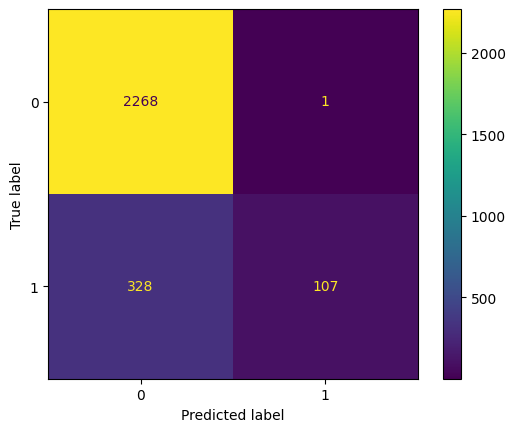

In [14]:
cm = confusion_matrix(y_test, predictions, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logreg.classes_)

disp.plot()
plt.show()

TP = 2268,
FP = 1,
FN = 328,
TN = 107

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2269
           1       0.99      0.25      0.39       435

    accuracy                           0.88      2704
   macro avg       0.93      0.62      0.66      2704
weighted avg       0.89      0.88      0.85      2704



In [18]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train_resampled, y_train_resampled)

y_pred = lgbm.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lgbm.score(X_test, y_test))) #Percentage
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2269
           1       0.94      0.97      0.95       435

    accuracy                           0.98      2704
   macro avg       0.97      0.98      0.97      2704
weighted avg       0.98      0.98      0.98      2704



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2269
           1       0.95      0.96      0.95       435

    accuracy                           0.98      2704
   macro avg       0.97      0.97      0.97      2704
weighted avg       0.98      0.98      0.98      2704



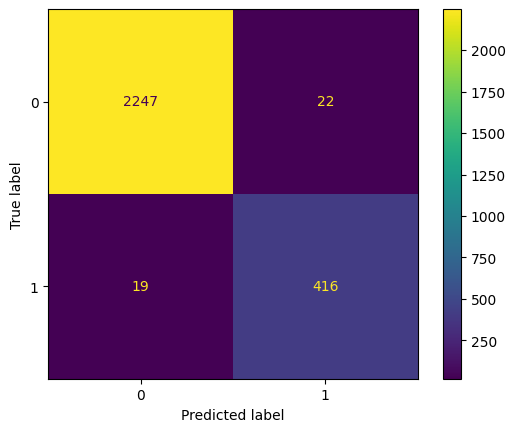

In [21]:
model = xgb.XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()
plt.show()

It seems like SMOTE doesn't make a big difference in this situation for the best model which is XGBoost. But i will keep using it.

Using GridSearch i will try to find the best parameters for XGBoost as it it the best model for now.

Best Hyperparameters:  {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Score:  0.9874863528147039
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2269
           1       0.96      0.96      0.96       435

    accuracy                           0.99      2704
   macro avg       0.97      0.98      0.97      2704
weighted avg       0.99      0.99      0.99      2704



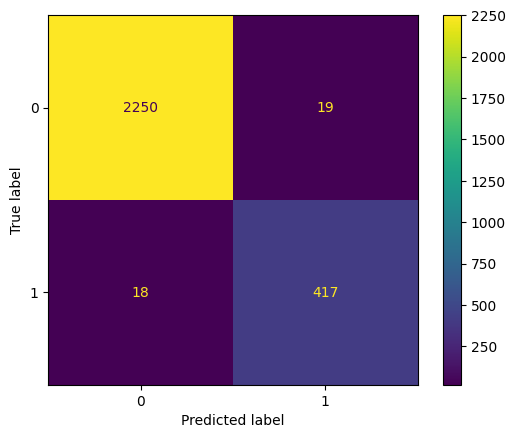

In [39]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.5],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1]
}

xgb_model = XGBClassifier(random_state=42)


grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()
plt.show()

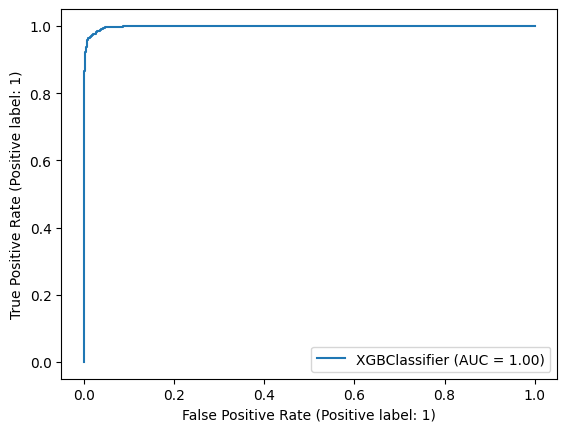

In [40]:
plot_roc_curve(best_model,X_test,y_test);